# Plots for stencil runtime cuda vs. gt4py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cmaps
import math

Domain: nx = ny = 128 const, nz varies

In [2]:
# read measurement data from files
df_nz = pd.read_csv("stencil_gpu_scaling_265510.csv")
df_gt4py_gpu = pd.read_csv("stencil_gt4py_gpu_306785.csv")
df_gt4py_gpu_notrafo = pd.read_csv("stencil_gt4py_gpu_notransfer_308524.csv")
df_nz.head()

,Nx,Ny,Nz,NUM_ITER,NUM_STREAMS,Time
0,128,128,8,32,1,0.001981
1,128,128,8,32,2,0.001855
2,128,128,8,32,4,0.001820
3,128,128,8,32,8,0.001999
4,128,128,8,32,16,0.002447


In [3]:
# overview over configurations contained in data
nz = df_nz["Nz"].unique()
nz_gt = df_gt4py_gpu['Nz'].unique()
numiters = df_nz["NUM_ITER"].unique()
numstreams = df_nz["NUM_STREAMS"].unique()
print("NUM_ITER: ", numiters)
print("NUM_STREAMS: ", numstreams)
print("Nz: ", nz)
print("Nz from GT4Py measurements: ", nz_gt)  # smaller than nz from df_nz

NUM_ITER:  [  32   64  128  256  512 1024]
NUM_STREAMS:  [  1   2   4   8  16  32  64 128 256]
Nz:  [    8    16    32    64   128   256   512  1024  2048  4096  8192 16384
 32768 65536]
Nz from GT4Py measurements:  [   8   16   32   64  128  256  512 1024 2048 4096 8192]


## Runtime vs. streams

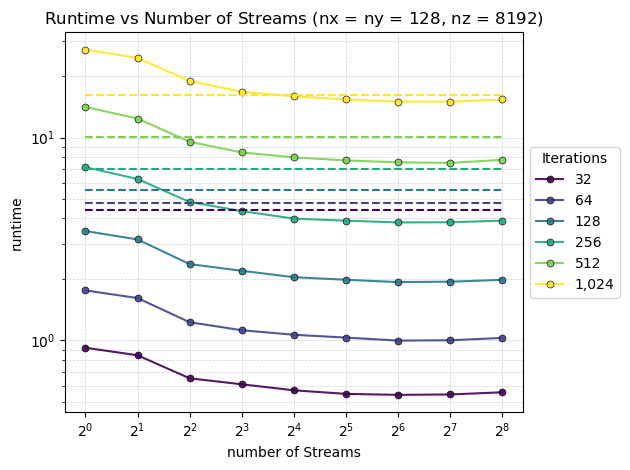

In [6]:
# special case: big overhead for GT4Py execution --> we don't know why
numstreams = df_nz['NUM_STREAMS'].unique()
numiters = df_nz['NUM_ITER'].unique()

col6 = plt.cm.viridis(np.linspace(0, 1, 6))

# plt.figure(figsize=(8, 6))
plt.figure(figsize=(6.4, 4.8))

nz_fix = 2**13

df_gt_nz = df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix]

for idx, tsteps in enumerate(numiters):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz_fix)]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}',
                 color=col6[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of Streams')
plt.ylabel('runtime')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Iterations')
plt.title(f"Runtime vs Number of Streams (nx = ny = 128, nz = ${nz_fix}$)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

for i,n in enumerate(numiters):
    t_gt4py = df_gt_nz[df_gt_nz['NUM_ITER'] == n]['Time']
    plt.plot([1,2**8], 2*[t_gt4py], '--', color=col6[i])

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig(f"stencil_runtime_vs_gt4py_{nz_fix}.pdf")
plt.show()

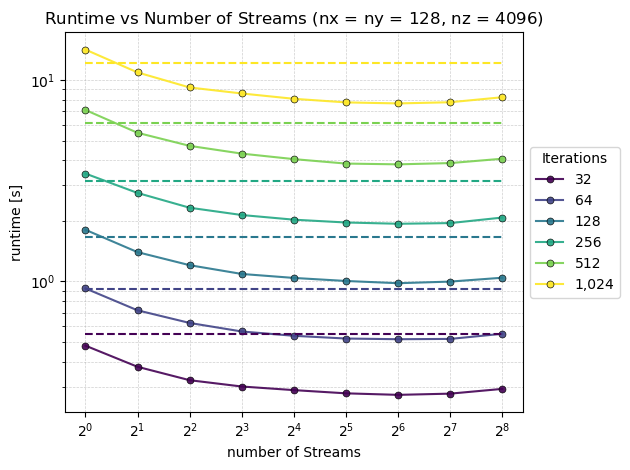

In [7]:
numstreams = df_nz['NUM_STREAMS'].unique()
numiters = df_nz['NUM_ITER'].unique()

# plt.figure(figsize=(8, 6))
plt.figure(figsize=(6.4, 4.8))

nz_fix = 2**12

df_gt_nz = df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix]

for idx, tsteps in enumerate(numiters):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz_fix)]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}',
                 color=col6[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of Streams')
plt.ylabel('runtime [s]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Iterations')
plt.title(f"Runtime vs Number of Streams (nx = ny = 128, nz = ${nz_fix}$)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

for i,n in enumerate(numiters):
    t_gt4py = df_gt_nz[df_gt_nz['NUM_ITER'] == n]['Time']
    plt.plot([1,2**8], 2*[t_gt4py], '--', color=col6[i])

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig(f"stencil_runtime_vs_gt4py_{nz_fix}.pdf")
plt.show()

## linear fit plots

In [8]:
def plotnfit_time_of_iter(df, lbl=None, color='C0', ax=plt):
    """plot linear fit to data in df"""
    ax.plot(df['NUM_ITER'], df['Time'], f'.', markeredgecolor='black', label=lbl , markersize=9, color=color)

    prm = np.polyfit(df['NUM_ITER'], df['Time'], deg=1)
    fit_fct = np.poly1d(prm)
    x_numiters = np.array([0, 1050])
    y_t_fit = fit_fct(x_numiters)
    ax.plot(x_numiters, y_t_fit, f'-', zorder=0, alpha=0.7, color=color)

In [9]:
# see what x-values we have for more meaningful ticks below
df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix]['NUM_ITER'].unique()

array([  32,   64,  128,  256,  512, 1024])

In [10]:
# suppress tick label "32" in the plots below
ticks       = [0, 32,   64,  128,  256,  512, 1024]
tick_labels = [0, "",   64,  ' 128',  256,  512, 1024]
# ticks       = [32,   64,  128,  256,  512, 1024]
# tick_labels = ['32  ','  64','   128',  256,  512, 1024]

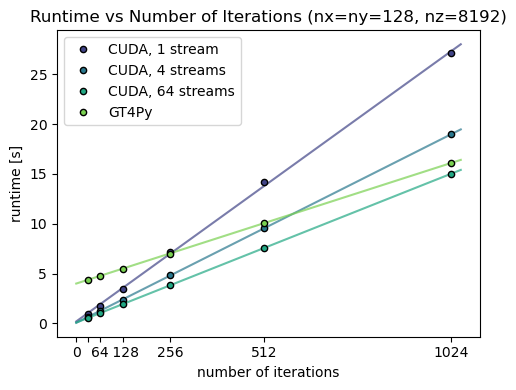

In [15]:
# USE PLOT FOR REPORT
nz_fix = 8192
assert(nz_fix in nz_gt)

plt.figure(figsize=(5,4))
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], "CUDA, 1 stream", col6[1])
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], "CUDA, 4 streams", col6[2])
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], "CUDA, 64 streams", col6[3])
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], "GT4Py", col6[4])
plt.xticks(ticks, tick_labels)
plt.legend(loc='best')
plt.xlabel("number of iterations")
plt.ylabel("runtime [s]")
plt.title(f"Runtime vs Number of Iterations (nx=ny=128, nz={nz_fix})")
plt.tight_layout()
plt.savefig(f"stencil_runtime_fit_nz={nz_fix}.pdf")

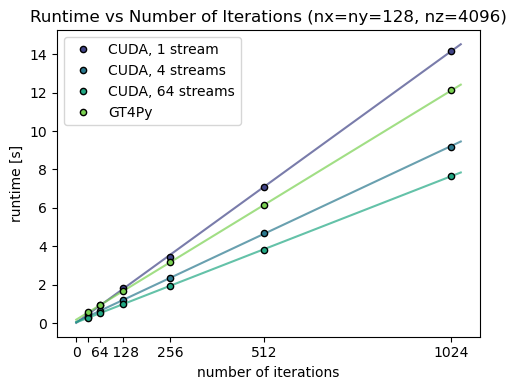

In [16]:
# USE PLOT FOR REPORT
nz_fix = 4096
assert(nz_fix in nz_gt)

plt.figure(figsize=(5,4))
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], "CUDA, 1 stream", color=col6[1])
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], "CUDA, 4 streams", color=col6[2])
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], "CUDA, 64 streams", color=col6[3])
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], "GT4Py", color=col6[4])
plt.xticks(ticks, tick_labels)
plt.legend(loc='best')
plt.xlabel("number of iterations")
plt.ylabel("runtime [s]")
plt.title(f"Runtime vs Number of Iterations (nx=ny=128, nz={nz_fix})")
plt.tight_layout()
plt.savefig(f"stencil_runtime_fit_nz={nz_fix}.pdf")

In [17]:
# explicitly redo the linear fits to read off the fit parameters
df_gt4096 = df_gt4py_gpu[df_gt4py_gpu['Nz'] == 4096]
parm4k = np.polyfit(df_gt4096["NUM_ITER"], df_gt4096["Time"], deg=1)
display(parm4k)
df_gt8192 = df_gt4py_gpu[df_gt4py_gpu['Nz'] == 8192]
parm8k = np.polyfit(df_gt8192["NUM_ITER"], df_gt8192["Time"], deg=1)
display(parm8k)

array([0.01166075, 0.17373883])

array([0.0118339 , 3.99109718])

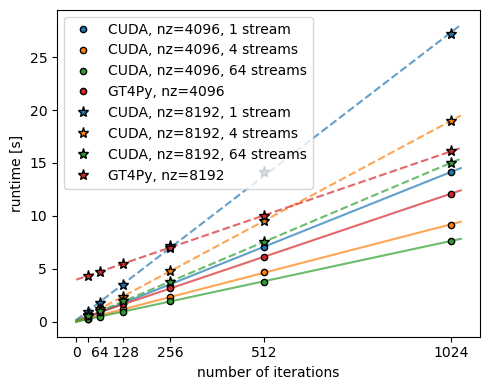

In [18]:
# test nz=4096 and 8192 in same plot --> too much
def plotnfit_time_of_iter2(df, lbl=None, color='C0', ax=plt):
    ax.plot(df['NUM_ITER'], df['Time'], f'*{color}', markeredgecolor='black', label=lbl , markersize=8)

    prm = np.polyfit(df['NUM_ITER'], df['Time'], deg=1)
    fit_fct = np.poly1d(prm)
    x_numiters = np.array([0, 1050])
    y_t_fit = fit_fct(x_numiters)
    ax.plot(x_numiters, y_t_fit, f'--{color}', zorder=0, alpha=0.7)

plt.figure(figsize=(5,4))
nz_fix  = 4096
assert(nz_fix  in nz_gt)
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 1 stream", "C0")
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 4 streams", "C1")
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 64 streams", "C2")
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py, nz={nz_fix}", "C3")
nz_fix = 8192
assert(nz_fix  in nz_gt)
plotnfit_time_of_iter2(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 1 stream", "C0")
plotnfit_time_of_iter2(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 4 streams", "C1")
plotnfit_time_of_iter2(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, nz={nz_fix}, 64 streams", "C2")
plotnfit_time_of_iter2(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py, nz={nz_fix}", "C3")

plt.xticks(ticks, tick_labels)
plt.legend(loc='best')
plt.xlabel("number of iterations")
plt.ylabel("runtime [s]")
plt.tight_layout()
# plt.savefig(f"stencil_runtime_fit_combi.pdf")

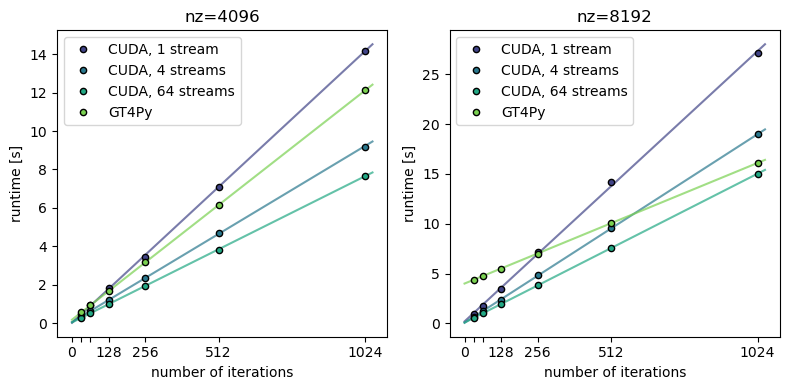

In [19]:
# test two plots in one figure --> to small in a two collumn document
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

xtick_labels2 = [0, "", "",  128,  256,  512, 1024]

nz_fix  = 4096
assert(nz_fix  in nz_gt)
ax1.set_title(f"nz={nz_fix}")
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, 1 stream", color=col6[1], ax=ax1)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, 4 streams", color=col6[2], ax=ax1)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, 64 streams", color=col6[3], ax=ax1)
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py", color=col6[4], ax=ax1)
ax1.set_xticks(ticks, xtick_labels2)
ax1.legend(loc='best')
ax1.set_xlabel("number of iterations")
ax1.set_ylabel("runtime [s]")
nz_fix = 8192
assert(nz_fix  in nz_gt)
ax2.set_title(f"nz={nz_fix}")
plotnfit_time_of_iter(df_nz[(df_nz["NUM_STREAMS"] == 1) & (df_nz['Nz'] == nz_fix)], f"CUDA, 1 stream", color=col6[1], ax=ax2)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 4) & (df_nz['Nz'] == nz_fix)], f"CUDA, 4 streams", color=col6[2], ax=ax2)
plotnfit_time_of_iter(df_nz[(df_nz['NUM_STREAMS'] == 64) & (df_nz['Nz'] == nz_fix)], f"CUDA, 64 streams", color=col6[3], ax=ax2)
plotnfit_time_of_iter(df_gt4py_gpu[df_gt4py_gpu['Nz'] == nz_fix], f"GT4Py", color=col6[4], ax=ax2)
ax2.set_xticks(ticks, xtick_labels2)
ax2.legend(loc='best')
ax2.set_xlabel("number of iterations")
ax2.set_ylabel("runtime [s]")
plt.tight_layout()
plt.savefig(f"stencil_runtime_fit_combi.pdf")

------------
# Measurements without the data transfer

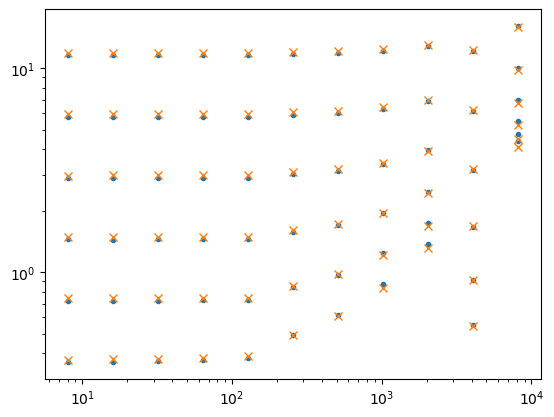

In [16]:
# Only small difference between measuring with and without transfer of data 
# to and from GPU. In many cases GT4Py is even faster with the data transfer.
# --> don't include in report (not very interesting)
plt.loglog(df_gt4py_gpu['Nz'], df_gt4py_gpu['Time'], ".")
plt.loglog(df_gt4py_gpu_notrafo['Nz'], df_gt4py_gpu_notrafo['Time'], "x")
# plt.loglog(df2_1stream['Size'], df2_1stream['Time'], ".")